# Chapter 10 Introduction to Artificial Neural Networks with Keras

In [2]:
import sys

sys.version_info

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)

## Imports 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.layers import Dense

In [6]:
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

## From Biological to Artificial Neuron

In [7]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

In [15]:
iris = load_iris(as_frame=True).frame

In [26]:
X = iris.drop("target", axis=1)
y = iris.target == 0   # Iris Setosa

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [29]:
per_clf = Perceptron(random_state=42, )
per_clf.fit(X_train, y_train)

Perceptron(random_state=42)

In [32]:
accuracy_score(per_clf.predict(X_test), y_test)

1.0

The Perceptron is equivalent to a SGDClassifier with loss="perceptron", no regularization, and a constant learning rate equal to 1:

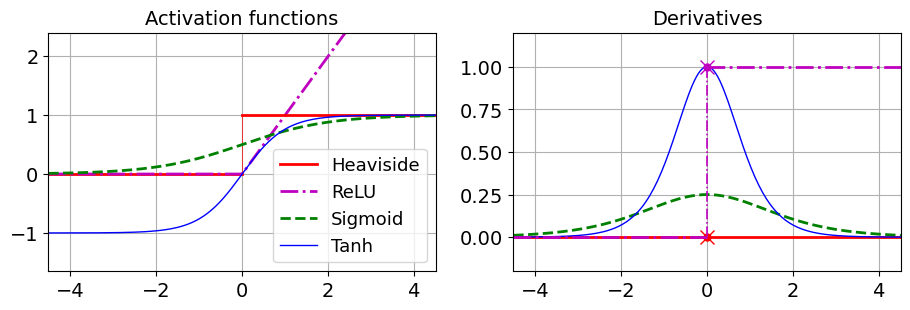

In [35]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])
plt.show()

## Regression MLP's

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, random_state=42, test_size=0.5)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>